# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [40]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data.isnull().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

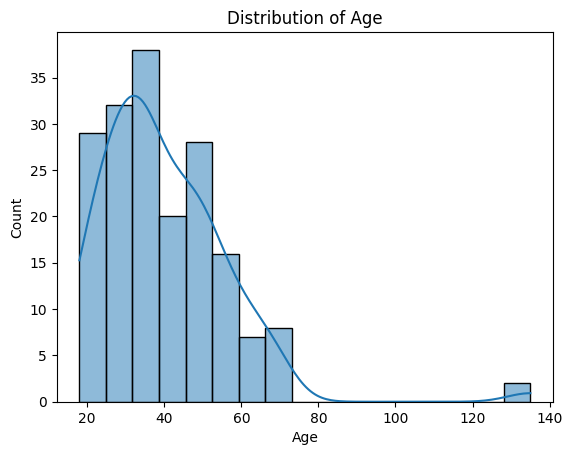

In [29]:
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

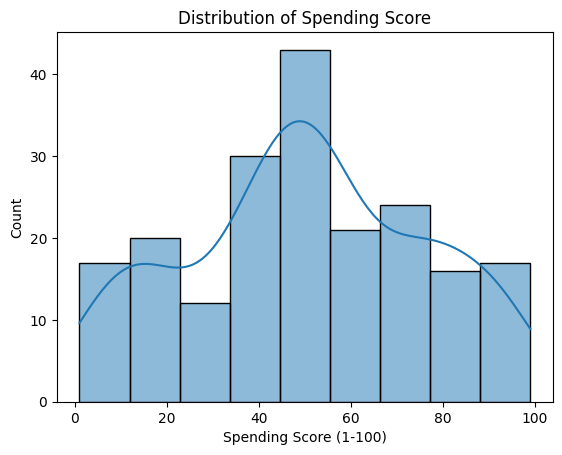

In [30]:
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()

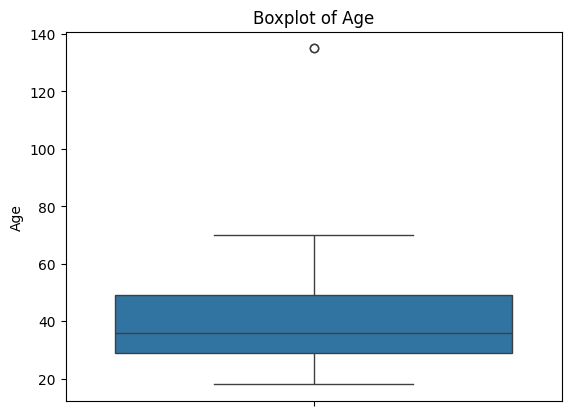

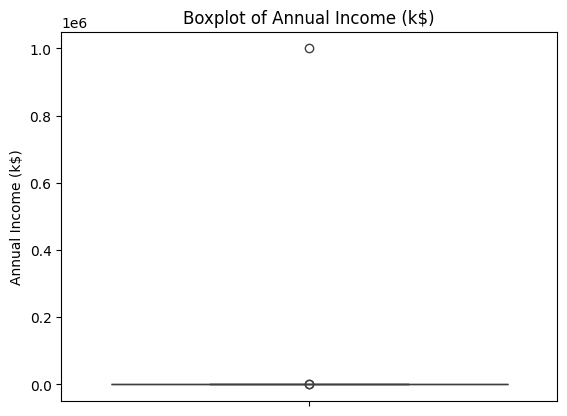

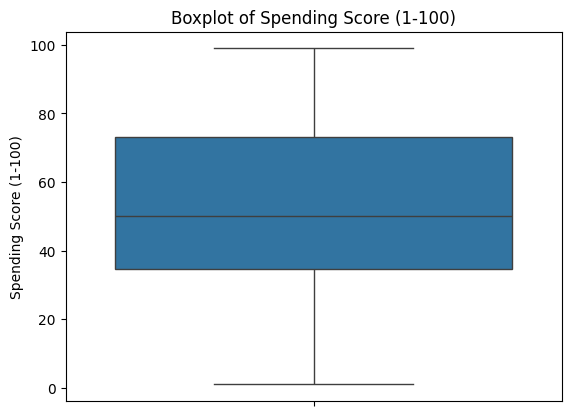

In [31]:
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Age, Annual Income (k$) имеют выбросы

У Spending Score (1-100) плохо сбалансированны данные

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [32]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

train_data['Age'] = imputer.fit_transform(train_data[['Age']])
train_data['Annual Income (k$)'] = imputer.fit_transform(train_data[['Annual Income (k$)']])
train_data['Spending Score (1-100)'] = imputer.fit_transform(train_data[['Spending Score (1-100)']])

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [ ]:
Q1 = train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

train_data = train_data[~((train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) | 
                           (train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(train_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [ ]:
train_data = pd.get_dummies(train_data, columns=['Genre'], drop_first=True)

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [37]:
test_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
test_data = pd.get_dummies(test_data, columns=['Genre'], drop_first=True)

imputer = SimpleImputer(strategy='median')

for column in test_data.columns:
    test_data[column] = imputer.fit_transform(test_data[[column]])

test_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.transform(test_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])